# Task 2: Taxi Fare Prediction ✋ ✊ ✋ ✊ ✋ ✊

In this task we'll use regression to fit a model that predicts a taxi fare.<br> <br>
**Team members:**
> - Seif Yasser (Team Leader)<br>
> - Nourhan AbdAllah Noureldin<br>
> - Yasmine sameh<br>
> - Bassem mahmoud elsayed ahmed<br>
> - Maram Hatem mahmoud El dabaa<br>
> - Aya Ahmed<br>

# Table of Contents
- [1.1 Understanding Dataset](#Understanding-Dataset) 🔭

- [1.2 EDA](#EDA) 🔍
 - [1.2.1 Cleaning Dataset](#cleaning)
 - [1.2.2 Removing Nulls](#nulls)
 - [1.2.3 Checking for Duplicates](#duplicates)
 - [1.2.4 Removing unreal data](#unreal)

- [1.3 Visualization](#Visualization) 👀
 - [1.3.1 Univariate Analysis](#univariate)
 - [1.3.2 Bivariate Analysis](#bivariate)

- [1.4 Preprocessing](#Preprocessing) 😵
 - [1.4.1 Handling Outliers](#outliers)
 - [1.4.2 Encoding](#encoding)
 - [1.4.3 Feature Selection](#selection)
 - [1.4.4 Normalization](#normalization)
 - [1.4.5 Splitting data into train and test](#splitting)

- [2.1 Applying Models](#models) ☣
 - [2.1.1 Linear Regression](#linear)
 - [2.1.2 Polynomial Regression](#polynomial)
 - [2.1.3 Ridge Regression](#ridge)

- [2.2 Compare with last week's results](#compare) 🧭

- [2.3 Conclusion](#conclusion) 👑


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# path="final_internship_data.csv"
# data=pd.read_csv(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Cellula/final_internship_data.csv"

In [ ]:
data=pd.read_csv(path)

<a name="Understanding-Dataset"></a>
## 1.1 Understanding Dataset

In [ ]:
for i in data.columns:
    print("<font color='blue'> **"+i+":**","</font>**<br><br>")

<font color='blue'> **User ID:** </font>**<br><br>
<font color='blue'> **User Name:** </font>**<br><br>
<font color='blue'> **Driver Name:** </font>**<br><br>
<font color='blue'> **Car Condition:** </font>**<br><br>
<font color='blue'> **Weather:** </font>**<br><br>
<font color='blue'> **Traffic Condition:** </font>**<br><br>
<font color='blue'> **key:** </font>**<br><br>
<font color='blue'> **fare_amount:** </font>**<br><br>
<font color='blue'> **pickup_datetime:** </font>**<br><br>
<font color='blue'> **pickup_longitude:** </font>**<br><br>
<font color='blue'> **pickup_latitude:** </font>**<br><br>
<font color='blue'> **dropoff_longitude:** </font>**<br><br>
<font color='blue'> **dropoff_latitude:** </font>**<br><br>
<font color='blue'> **passenger_count:** </font>**<br><br>
<font color='blue'> **hour:** </font>**<br><br>
<font color='blue'> **day:** </font>**<br><br>
<font color='blue'> **month:** </font>**<br><br>
<font color='blue'> **weekday:** </font>**<br><br>
<font color='blue

> <font color='yellow'> **User ID:** </font> *Randomized identifier*<br><br>
<font color='yellow'> **User Name:** </font> *Passenger's name*<br><br>
<font color='yellow'> **Driver Name:** </font> *Driver's name*<br><br>
<font color='yellow'> **Car Condition:** </font> *Explains the car condition and state*<br><br>
<font color='yellow'> **Weather:** </font> *Shows the weather on that day the passanger got into the taxi*<br><br>
<font color='yellow'> **Traffic Condition:** </font> *Shows the traffic conditio*<br><br>
<font color='yellow'> **key:** </font> *Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field*<br><br>
<font color='yellow'> **fare_amount:** </font> *Target data -> the amout of money the passenger paid*<br><br>
<font color='yellow'> **pickup_datetime:** </font> *The pickup date and time for a passenger* <br><br>
<font color='yellow'> **pickup_longitude:** </font> *The Y-coordinate at the counter started calculating when the passanger arrives*<br><br>
<font color='yellow'> **pickup_latitude:** </font> *The X-coordinate at the counter started calculating when the passanger arrives*<br><br>
<font color='yellow'> **dropoff_longitude:** </font> *The Y-coordinate at the counter stopped calculating when the passanger leaves*<br><br>
<font color='yellow'> **dropoff_latitude:** </font> *The X-coordinate at the counter stopped calculating when the passanger leaves*<br><br>
<font color='yellow'> **passenger_count:** </font> *Indicating the number of passengers in the taxi ride*<br><br>
<font color='yellow'> **hour:** </font> *The exact hour the passanger got into the car*<br><br>
<font color='yellow'> **day:** </font> *The day the passanger got into the car*<br><br>
<font color='yellow'> **month:** </font> *The month the passanger got into the car*<br><br>
<font color='yellow'> **weekday:** </font> *The weekday the passanger got into the car*<br><br>
<font color='yellow'> **year:** </font> *The year the passanger got into the car*<br><br>
<font color='yellow'> **jfk_dist:** </font> *The distination to the John f Kennedy airport*<br><br>
<font color='yellow'> **ewr_dist:** </font> *The distination to the Newark Liberty Int. airport*<br><br>
<font color='yellow'> **lga_dist:** </font> *The distination to the Los Angeles airport*<br><br>
<font color='yellow'> **sol_dist:** </font> *The distination to the Solomon airport*<br><br>
<font color='yellow'> **nyc_dist:** </font> *The distination to the New York City airport*<br><br>
<font color='yellow'> **distance:** </font> *The final distance calculated by the counter from the pickup point to the distination*<br><br>
<font color='yellow'> **bearing:** </font> *Direction of travel from the pickup point to drop* <br><br>

## <a name="EDA"></a>1.2 EDA
Done by:
>- Seif
>- Bassem

In [ ]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

It shows that there is:
>- <font color=red>5 NULLS</font> in `dropoff_longitude` column
>- <font color=red>5 NULLS</font> in `dropoff_latitude` column
>- <font color=red>5 NULLS</font> in `jfk_dist` column
>- <font color=red>5 NULLS</font> in `ewr_dist` column
>- <font color=red>5 NULLS</font> in `lga_dist` column
>- <font color=red>5 NULLS</font> in `sol_dist` column
>- <font color=red>5 NULLS</font> in `nyc_dist` column
>- <font color=red>5 NULLS</font> in `distance` column
>- <font color=red>5 NULLS</font> in `bearing` column

In [ ]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [ ]:
data.shape

(500000, 26)

In [ ]:
data.max()

User ID                                 zzz7sn3L
User Name                             Zoe Wilson
Driver Name                            Zoe Young
Car Condition                          Very Good
Weather                                    windy
Traffic Condition                   Flow Traffic
key                  2015-06-30 23:38:21.0000003
fare_amount                                500.0
pickup_datetime              2015-06-30 23:38:21
pickup_longitude                       37.360538
pickup_latitude                        29.724576
dropoff_longitude                       0.712985
dropoff_latitude                        7.061893
passenger_count                                6
hour                                          23
day                                           31
month                                         12
weekday                                        6
year                                        2015
jfk_dist                             30133.06788
ewr_dist            

In [ ]:
data.dtypes

User ID               object
User Name             object
Driver Name           object
Car Condition         object
Weather               object
Traffic Condition     object
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object

In [ ]:
data.tail()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
499995,er7Luy6J,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12,-1.291173,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,FWDZu9NA,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34,-1.291595,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,QZIMcpLZ,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20,-1.291262,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,AD72Uwmn,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32,-1.291101,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817
499999,qGKn4Um5,Eric Jones,Julie King,Very Good,sunny,Flow Traffic,2010-04-12 23:46:58.0000002,4.9,2010-04-12 23:46:58,-1.291312,...,4,0,2010,38.822968,31.517592,23.087427,11.950577,3.873636,1.040272,-2.813690


In [ ]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [ ]:
###number of unique values in each column
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()

for column in num:
    unique_categories_count = data[column].nunique()
    print(f'Unique categories in {column}: {unique_categories_count}')
    print (data[column].unique())

print('-'*80)

for column in cat:
    unique_categories_count = data[column].nunique()
    print(f'Unique categories in {column}: {unique_categories_count}')
    print (data[column].unique())

Unique categories in fare_amount: 1688
[ 4.5  16.9   5.7  ... 45.58 70.75 71.7 ]
Unique categories in pickup_longitude: 95037
[-1.28882636 -1.29182374 -1.29124237 ...  0.71099734 -1.29036613
 -1.28932245]
Unique categories in pickup_latitude: 119115
[0.71072109 0.71054628 0.71141837 ... 0.71004034 0.7113025  0.71067029]
Unique categories in dropoff_longitude: 108283
[-1.28877922 -1.2911818  -1.29139079 ...  0.71093809 -1.28763812
 -1.28973692]
Unique categories in dropoff_latitude: 135053
[0.7105633  0.71178025 0.71123148 ... 0.70976671 0.7100663  0.71102766]
Unique categories in passenger_count: 7
[1 2 3 6 5 4 0]
Unique categories in hour: 24
[17 16  0  4  7  9 20 13  1 11 19 12 14 18 15  6 21 23  3  8 10  2 22  5]
Unique categories in day: 31
[15  5 18 21  9  6 20  4  3  2  8 24 23 19 22  7 12 10 28 11 29 31  1 14
 16 17 27 25 30 26 13]
Unique categories in month: 12
[ 6  1  8  4  3 11 12  9  7  2  5 10]
Unique categories in weekday: 7
[0 1 3 5 2 6 4]
Unique categories in year: 7
[20

### <a name="cleaning"></a>1.2.1 Cleaning the data

In [ ]:
# Costing Features
data=data.drop(['User ID', 'User Name', 'Driver Name'],axis=1)

In [ ]:
data=data.drop(['key','pickup_datetime'],axis=1)

In [ ]:
print("fare_amount min value",data["fare_amount"].min())
print("fare_amount max value",data["fare_amount"].max())

fare_amount min value -44.9
fare_amount max value 500.0


In [ ]:
data = data[data['fare_amount'] > 0]
print("After filtering:", data.shape)

After filtering: (499965, 21)


In [ ]:
data

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


### <a name="nulls"></a>1.2.2 Removing Nulls

In [ ]:
data.isnull().sum()

Car Condition        0
Weather              0
Traffic Condition    0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
# mode_values = data.mode().iloc[0]

# # Fill missing values with the mode for each column
# data.fillna(mode_values, inplace=True)
# #to find null value in data_set
# print(data.isnull().sum())

### <a name="duplicates"></a>1.2.3 Checking for Duplicates

In [ ]:
data.duplicated().sum()

0

### <a name="unreal"></a>1.2.4 Removing unrealistic data

In [ ]:
(data['passenger_count']==0).sum()

1791

In [ ]:
data.shape

(499960, 21)

In [ ]:
#because it can't be calculating fare without passengers in the taxi
data=(data[data['passenger_count']!=0])

In [ ]:
data=data.reset_index(drop=True)

<a name="Visualization"></a>
## 1.3 Visualization
Done by:
>- Yasmine
>- Aya

### <a name="univariate"></a>1.3.1 Univariate Analysis

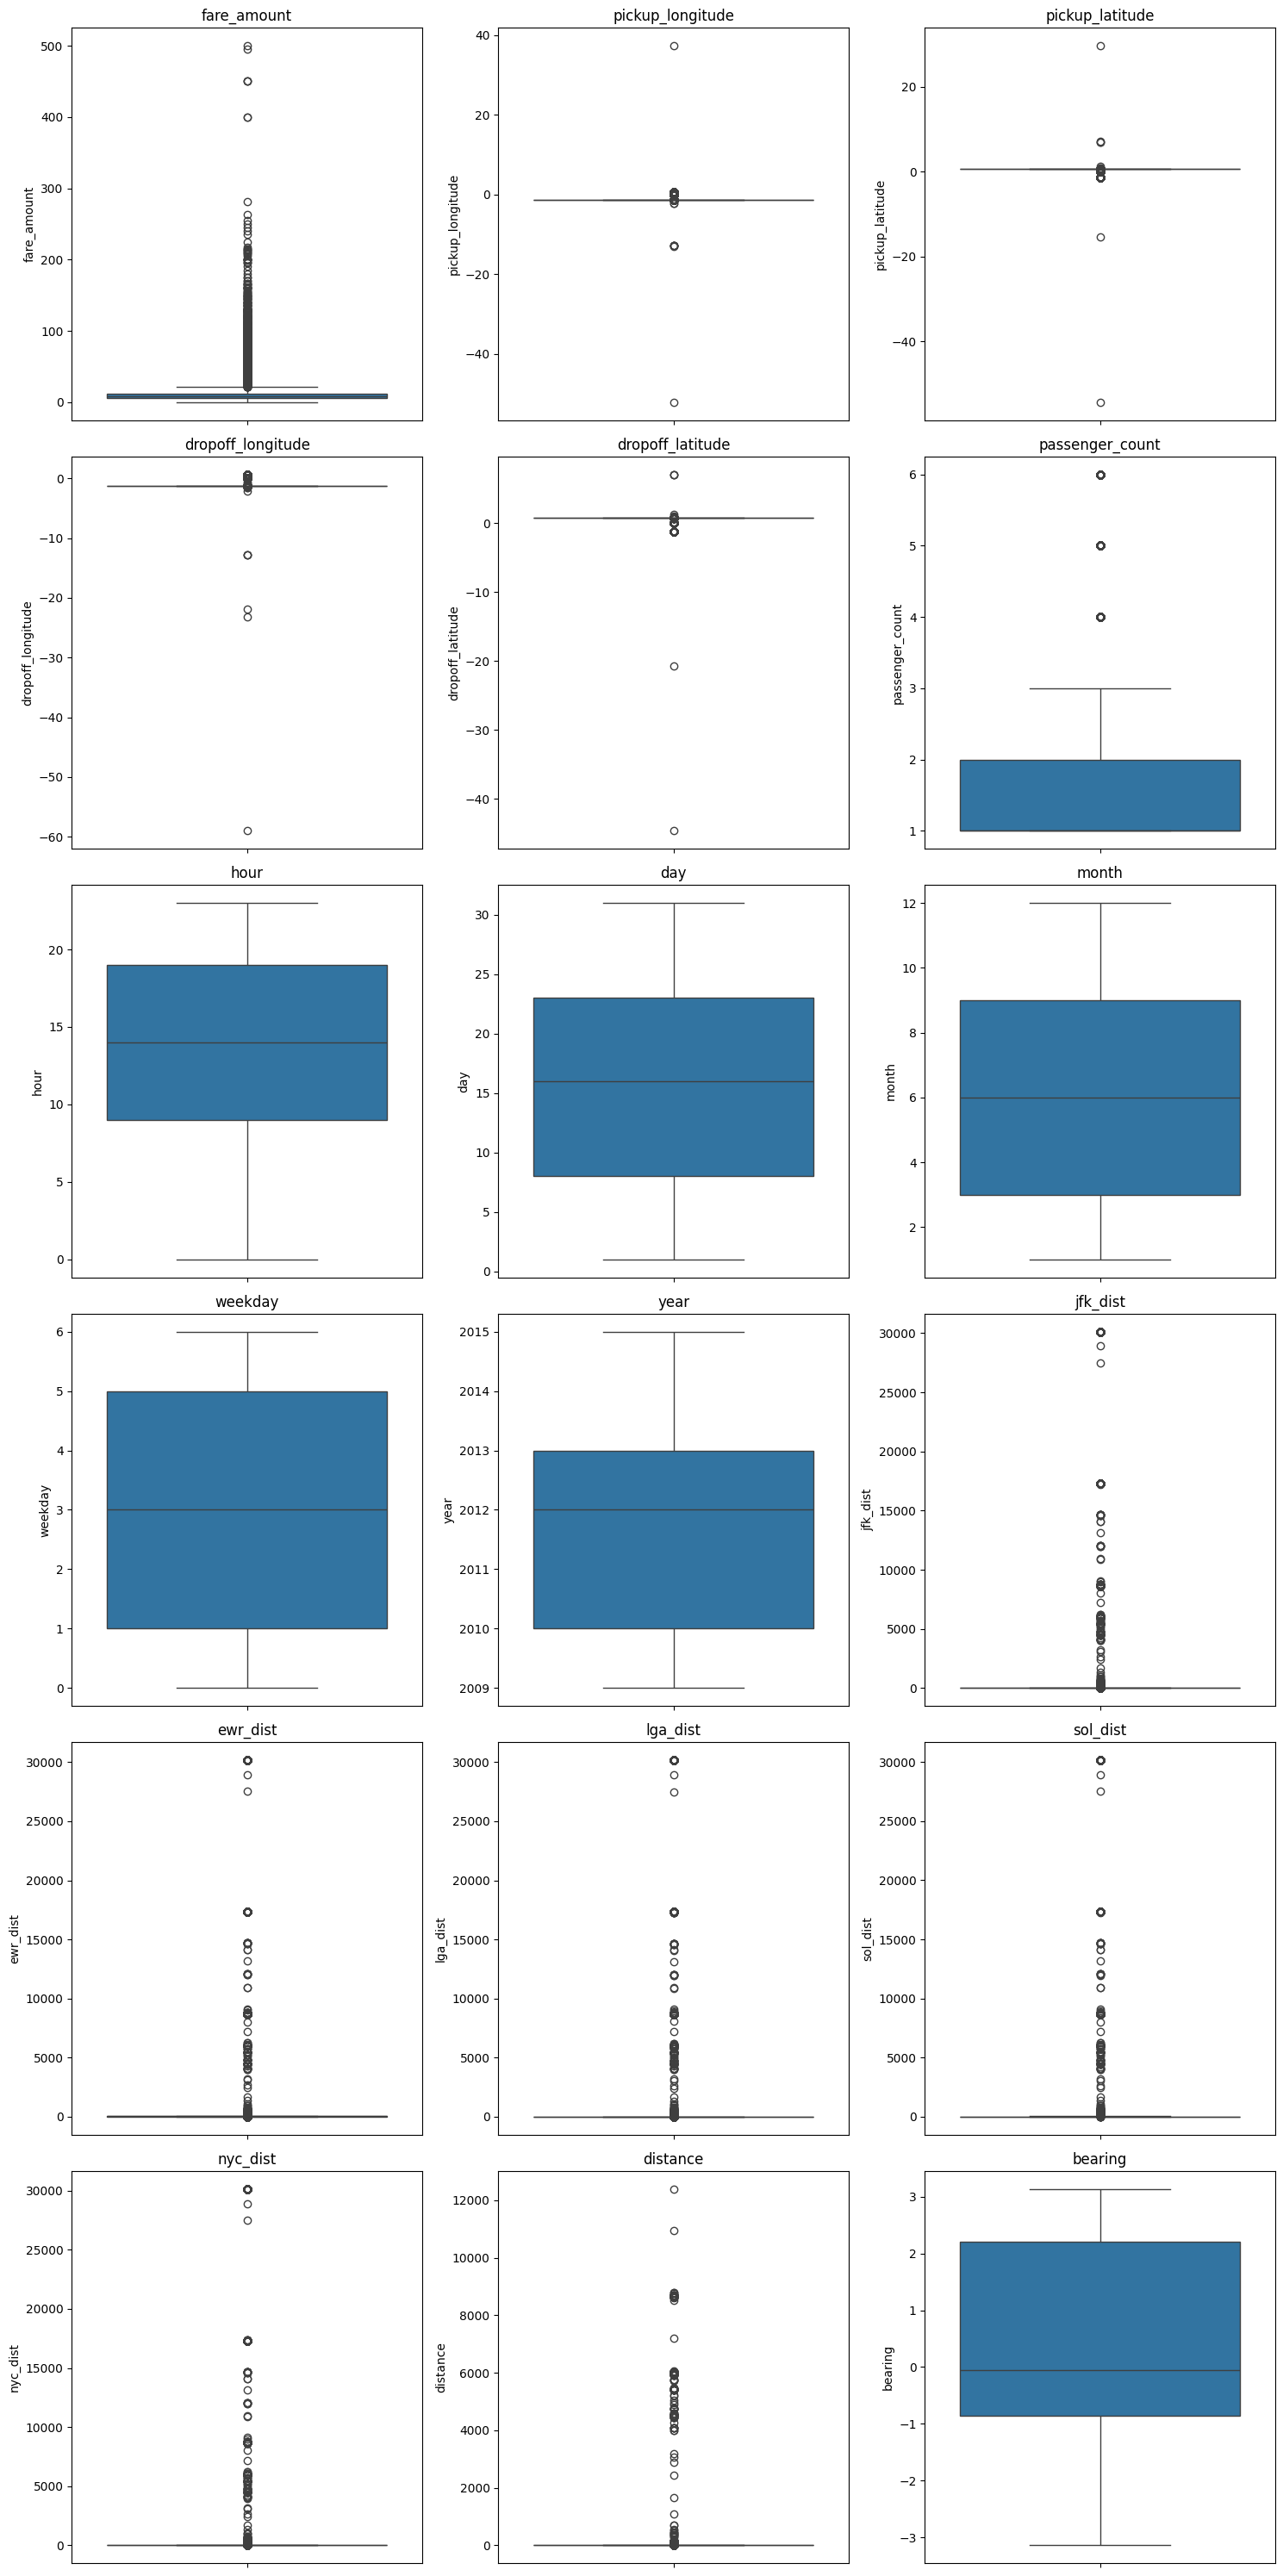

In [ ]:
#Numerical columns for which I want to create boxplots for
num_cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']

#Calculate number of rows needed for subplots
n = len(num_cols)
n_rows = n // 3
n_rows += n % 3

#Create subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

#Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    fig.delaxes(ax)

#Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    sns.boxplot(data[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

‘fare_amount’ column has outliers that need to be removed from (>400)

---


‘pickup_longtiude’ and ‘pickup_latitude’ columns have outliers to be removed (>10 and  <-10)

---


‘dropoff_longitude’ has outliers that need to be removed (<-10)

---


‘dropoff_latitude’ has outliers (>2 and <-10)

---


‘passengner_count’ has outliers (>4)

---


‘jfk_dist’,’lga_dist’,’sol_dist’,’nyc_dist’, and ’ewr_dist’ have outliers (>15000)

---


‘distance’ has outliers (>10000)

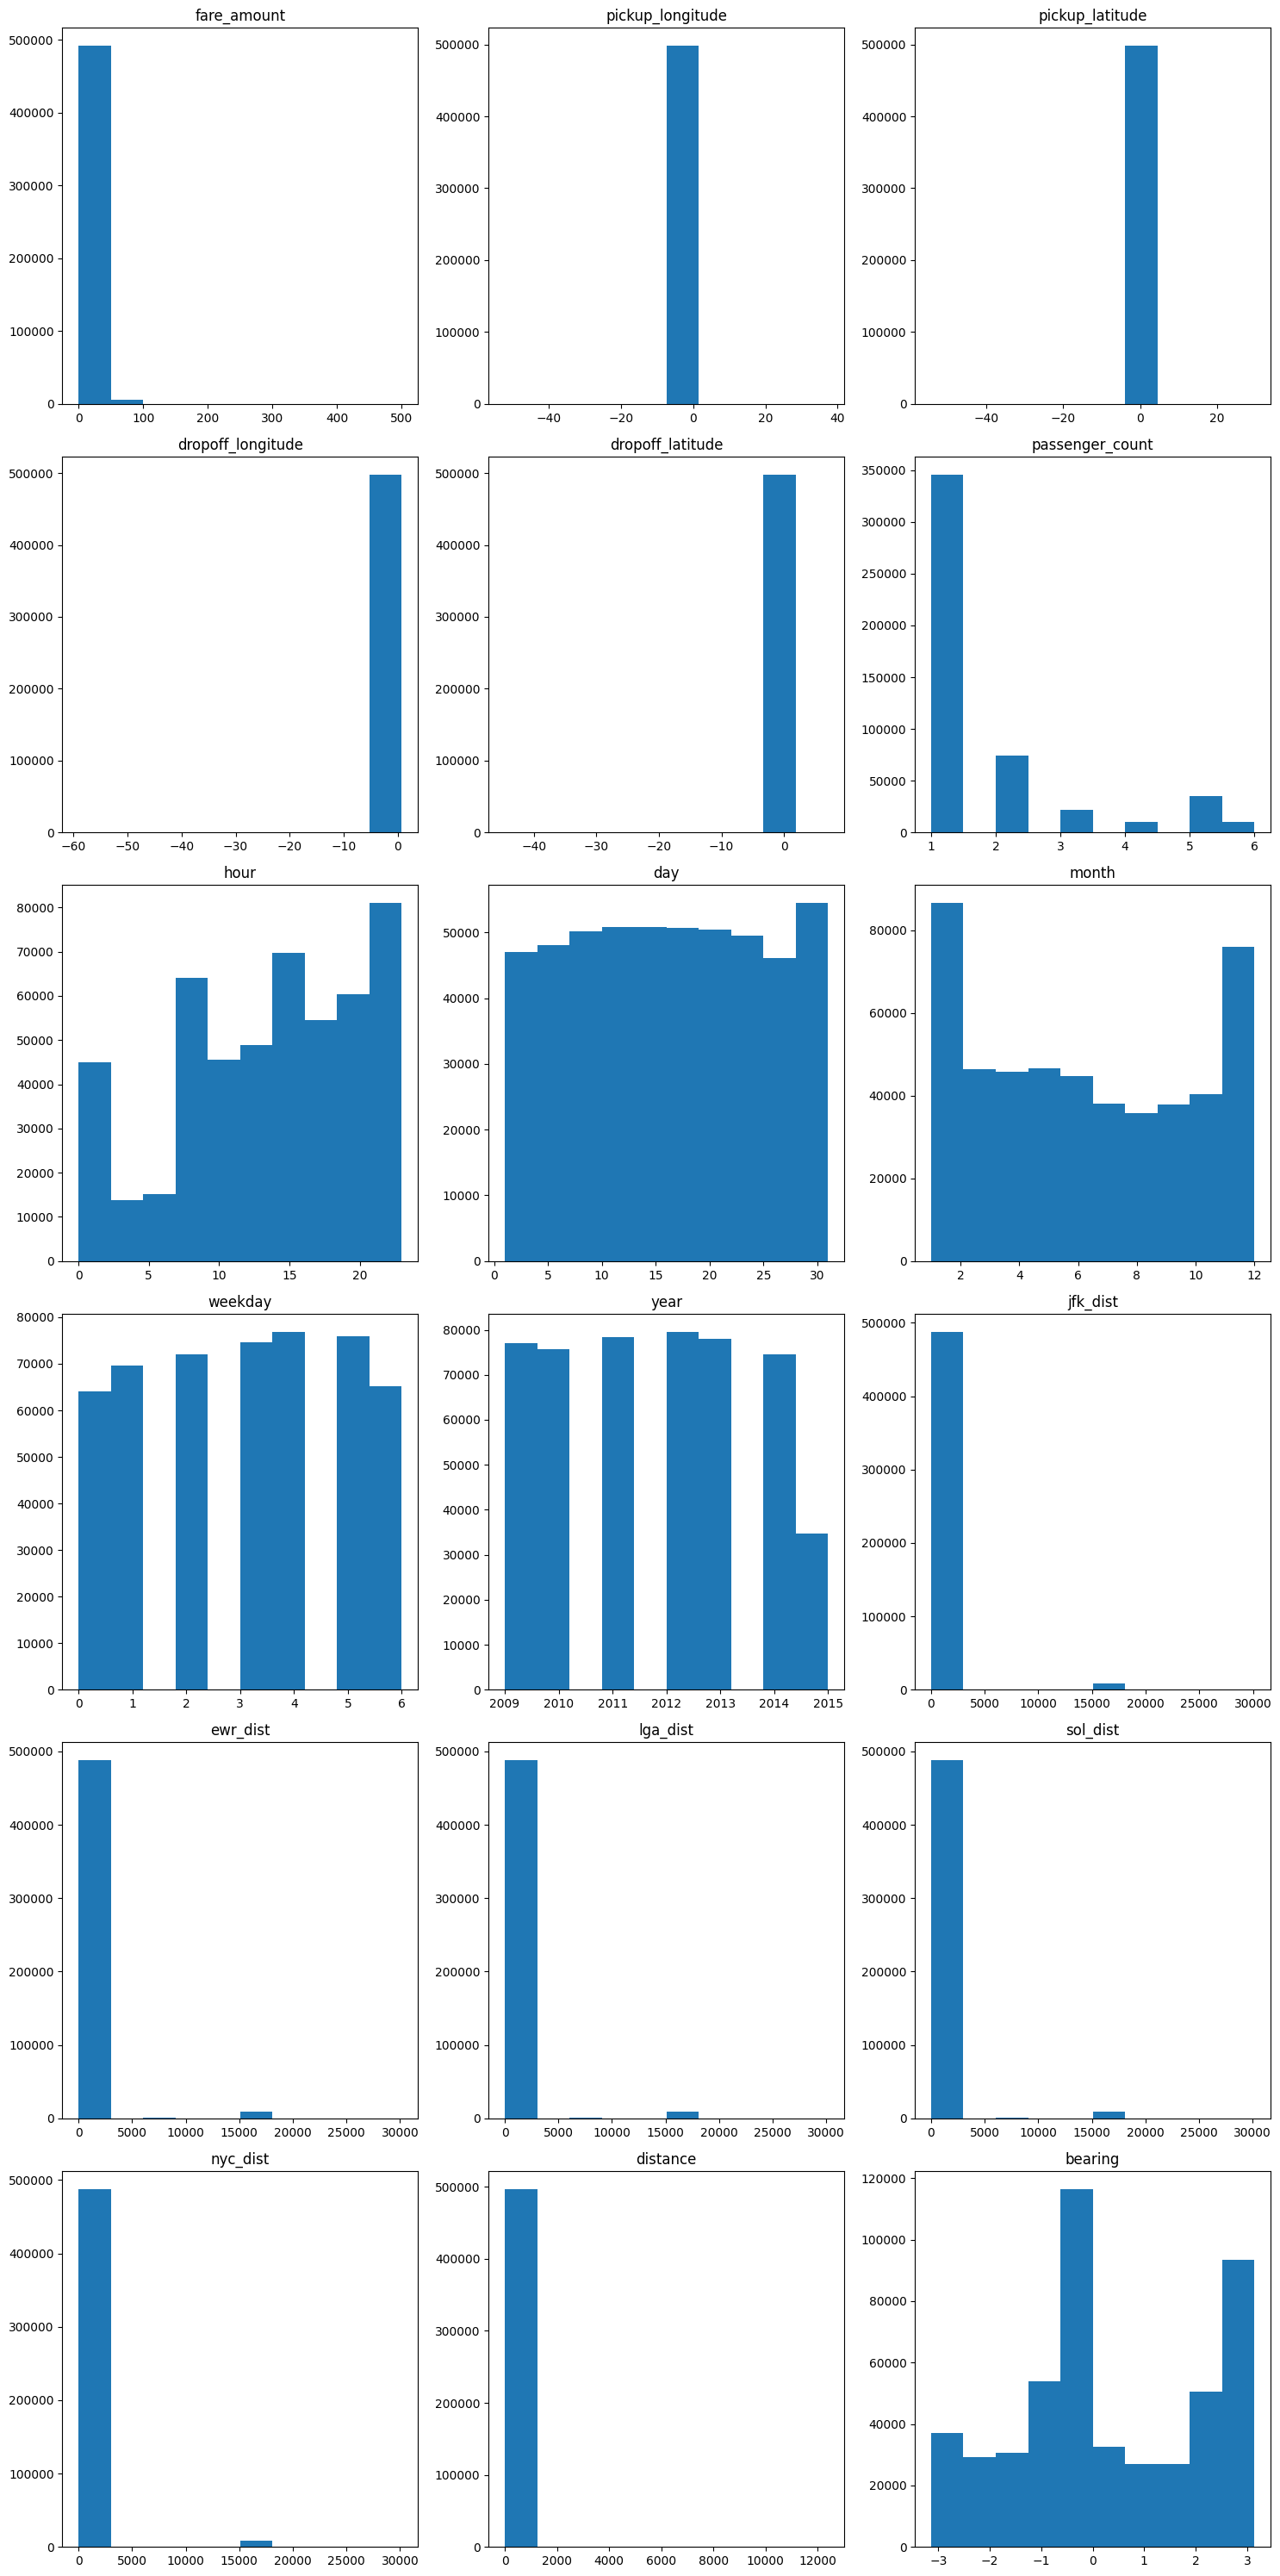

In [ ]:
#List of numerical columns to create histograms for them
num_cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']

# Calculate number of rows needed for subplots
n = len(num_cols)
n_rows = n // 3
n_rows += n % 3

#Create subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

#Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    fig.delaxes(ax)

#Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    axs[i].hist(data[col])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

‘Fare_amount’ has the highest amount between 0 and 100

---


‘Pickup_longtiude’,‘pickup_latitude’,‘Dropoff_longitude’,‘Dropoff_latitude’ has the highest amount at zero meter

---


‘Passengner_count’ has the highest number of passenger (=1)

---


‘Hour’ the hour that is most reserved is at 8 PM, ‘day’ is the 30th of the
months, and ‘month’ is January

---


‘Jfk_dist’,’lga_dist’,’sol_dist’,’nyc_dist’, ’ewr_dist’, and ‘distance’ are a lot around zero meter

---


‘Bearing’ has the highest number between -1 to 0

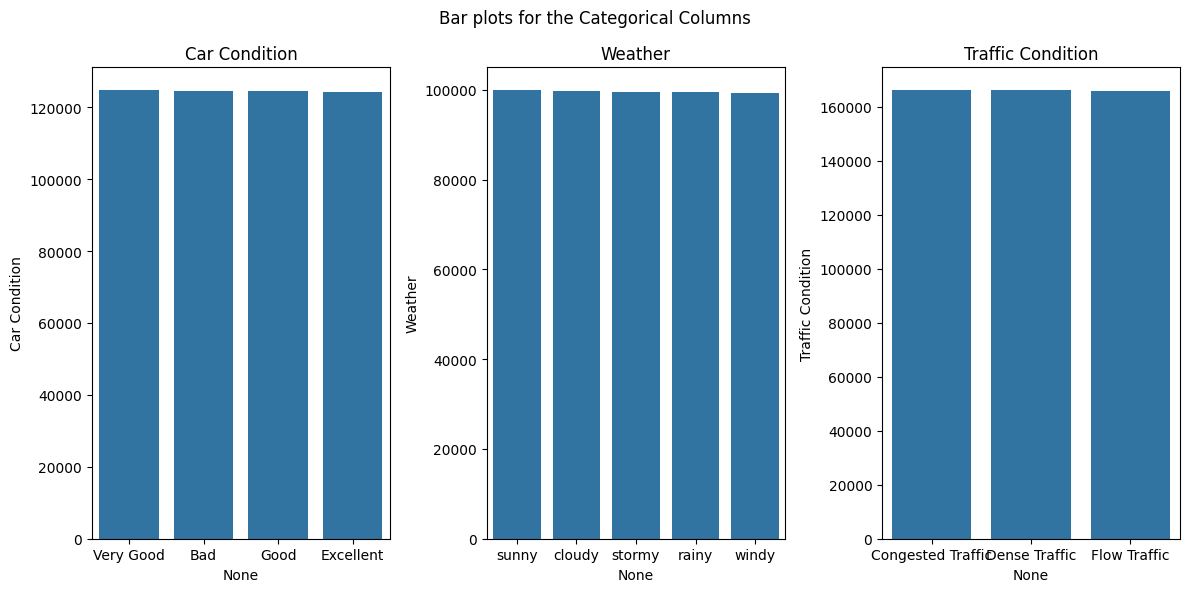

In [ ]:
#Categorical columns to create bar plots
num_cols = ['Car Condition', 'Weather', 'Traffic Condition']

fig, axs = plt.subplots(1, len(num_cols), figsize=(12, 6))

#Plot each column in a separate subplot
for i, column in enumerate(num_cols):
    counts = data[column].value_counts()
    sns.barplot(x=counts.index, y=counts, ax=axs[i])
    axs[i].set_title(column)

fig.suptitle("Bar plots for the Categorical Columns")
plt.tight_layout()
plt.show()

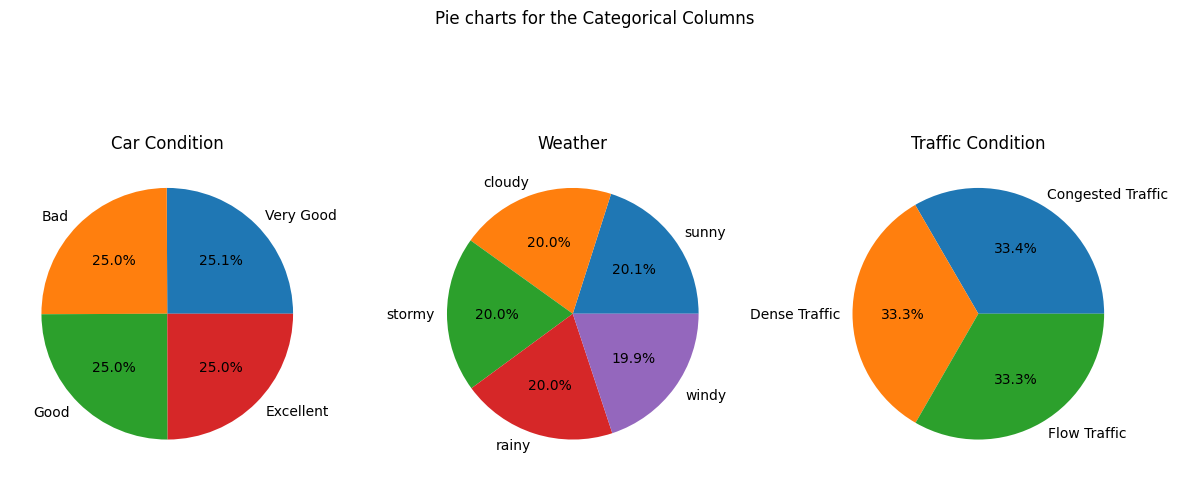

In [ ]:
#Categorical columns to create pie charts
num_cols = ['Car Condition', 'Weather', 'Traffic Condition']

fig, axs = plt.subplots(1, len(num_cols), figsize=(12, 6))

# Plot each column in a separate subplot
for i, column in enumerate(num_cols):
    counts = data[column].value_counts()
    axs[i].pie(counts, labels = counts.index, autopct='%1.1f%%')
    axs[i].set_title(column)

fig.suptitle("Pie charts for the Categorical Columns")
plt.tight_layout()
plt.show()

For the 'car condition' column, all the conditions are almost the same

---


For 'weather', the status of weather is approximately equivalent

---

For 'traffic', the traffic conditions are almost identical among the different status

<ipython-input-367-9310bdd58a1a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="viridis")


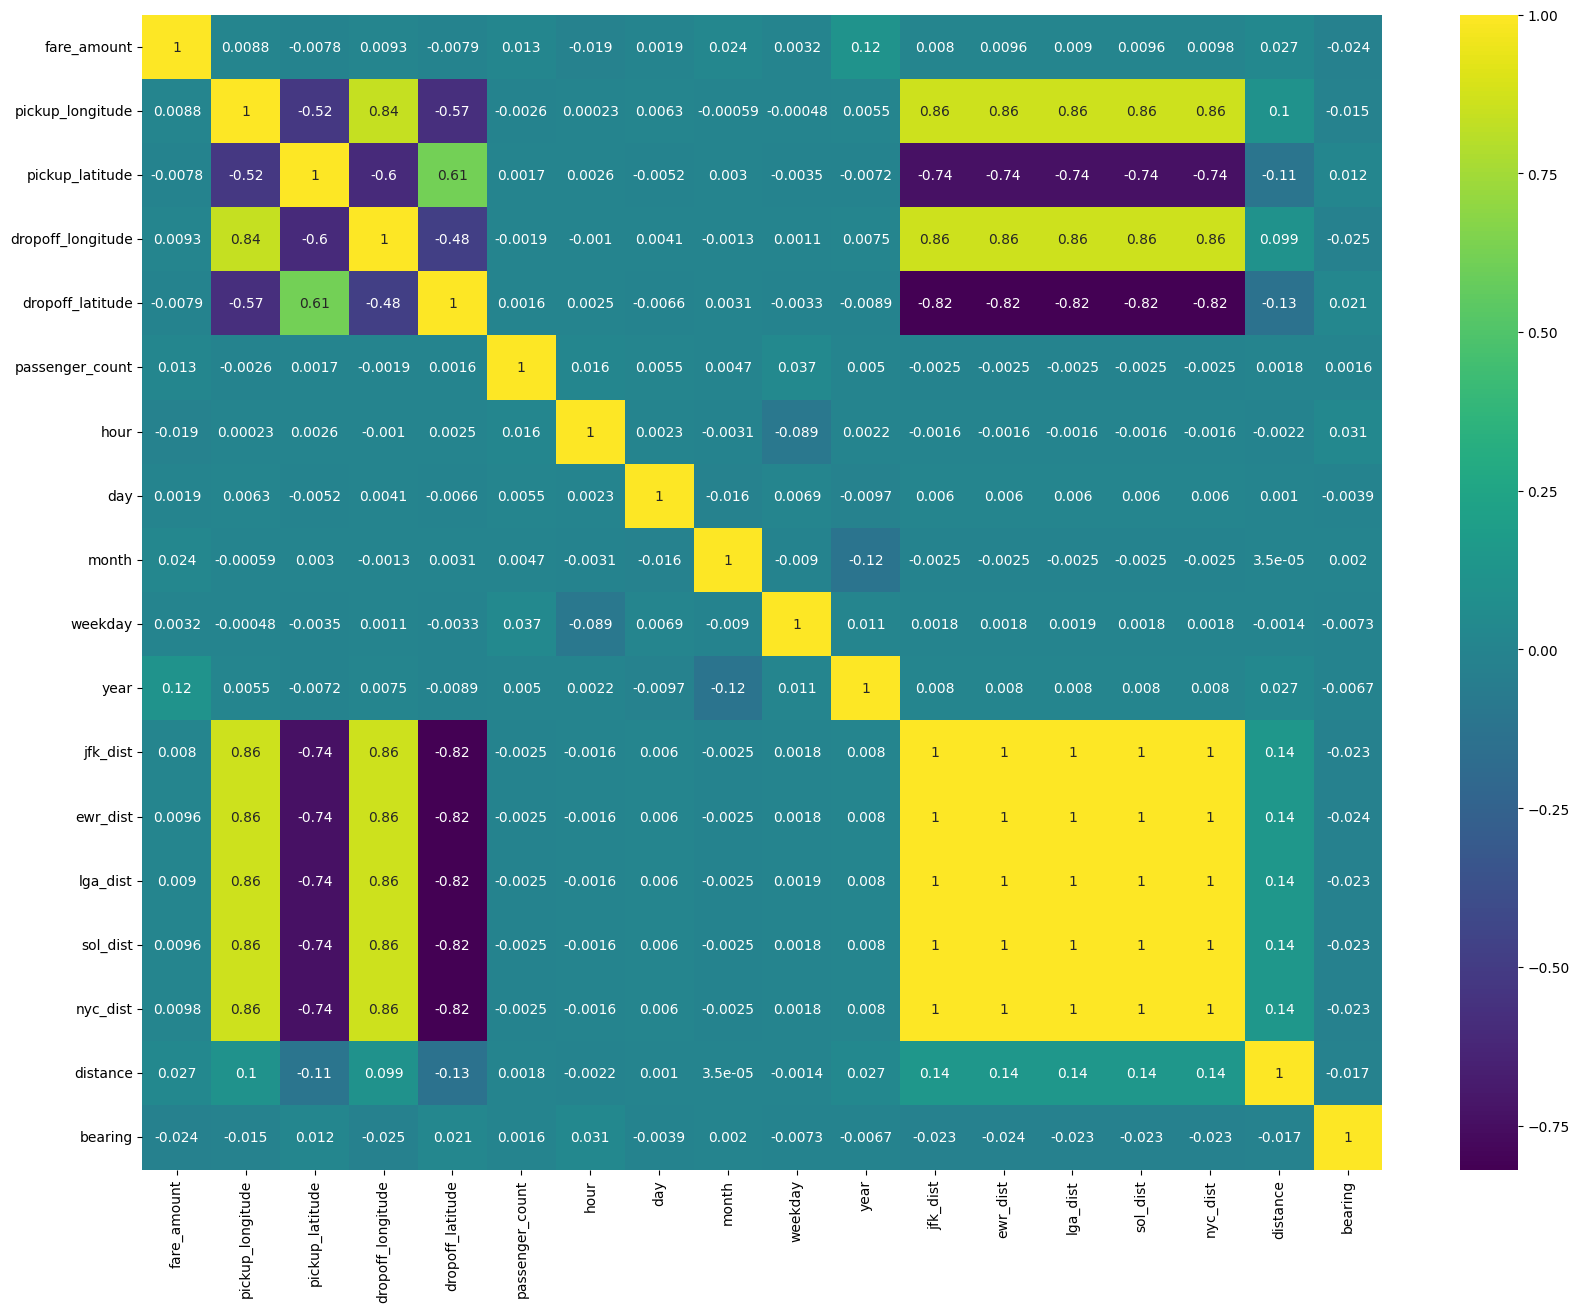

In [ ]:
#Heatmap to show the correlation between the columns
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap="viridis")
plt.show()

The correlation between the columns are moderate (some are too strong and others are weak)

### <a name="bivariate"></a>1.3.2 Bivariate Analysis

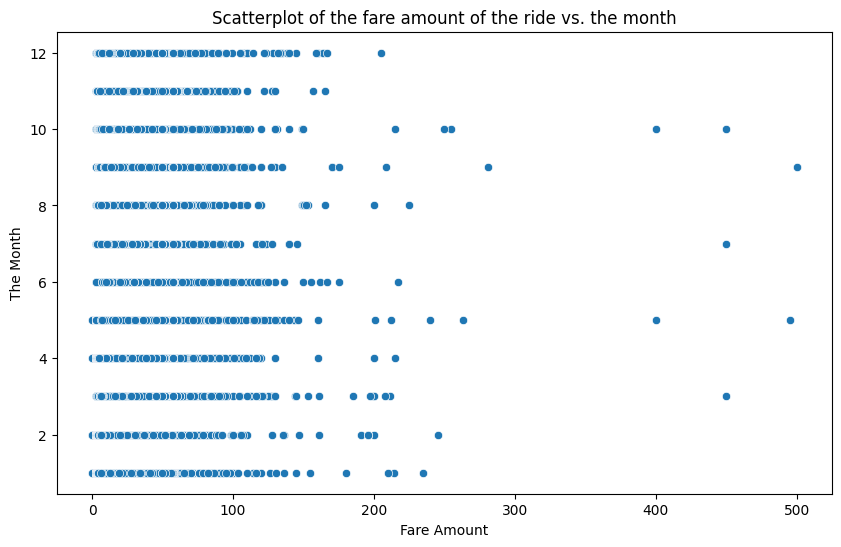

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="fare_amount", y="month")
plt.title("Scatterplot of the fare amount of the ride vs. the month")
plt.xlabel("Fare Amount")
plt.ylabel("The Month")
plt.show()

Fare amount are close to each other among the months

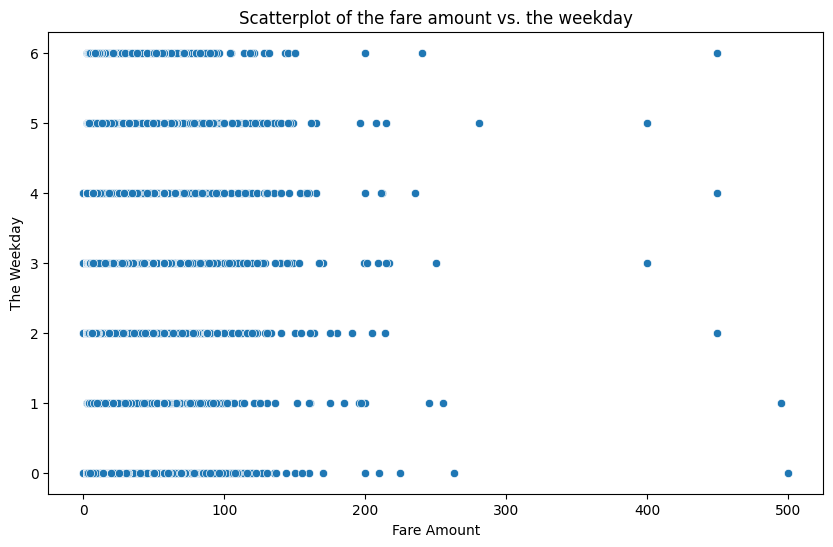

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="fare_amount", y="weekday")
plt.title("Scatterplot of the fare amount vs. the weekday")
plt.xlabel("Fare Amount")
plt.ylabel("The Weekday")
plt.show()

Fare amount are also close within the different week days

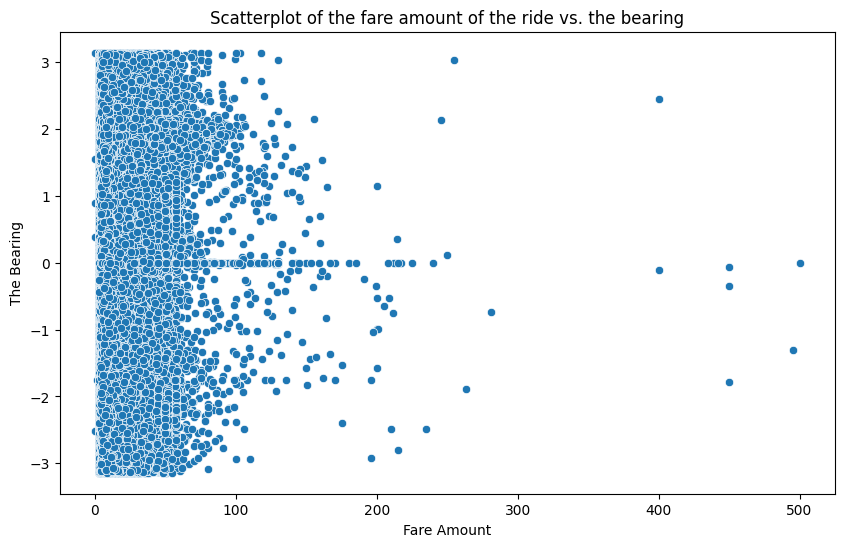

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="fare_amount", y="bearing")
plt.title("Scatterplot of the fare amount of the ride vs. the bearing")
plt.xlabel("Fare Amount")
plt.ylabel("The Bearing")
plt.show()

Fare amount is higher when the bearing=0

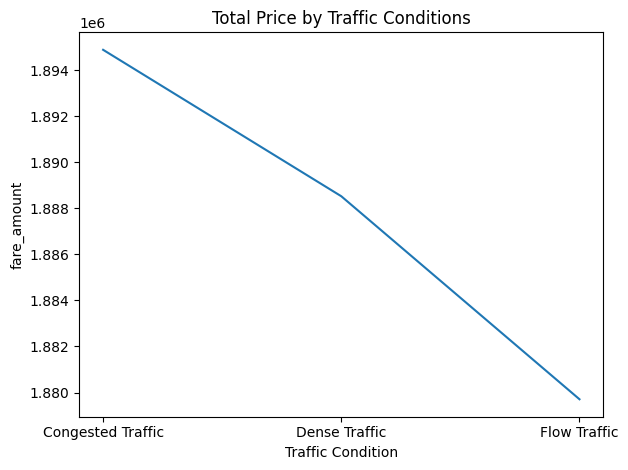

In [ ]:
#Group using "Traffic Condition" and calculate the sum of "fare_amount" for each group
data_group = data.groupby("Traffic Condition")["fare_amount"].sum().reset_index()
#Create a line plot for the sum data
sns.lineplot(data=data_group, x="Traffic Condition", y="fare_amount")
plt.title('Total Price by Traffic Conditions')
plt.tight_layout()
plt.show()

The congestion of the traffic increases the fare amount of the ride

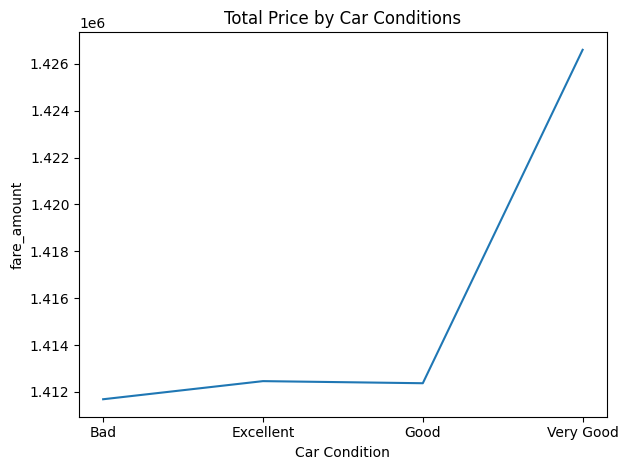

In [ ]:
#Group using "Traffic Condition" and calculate the sum of "fare_amount" for each group
data_group = data.groupby("Car Condition")["fare_amount"].sum().reset_index()
#Create a line plot for the sum data
sns.lineplot(data=data_group, x="Car Condition", y="fare_amount")
plt.title('Total Price by Car Conditions')
plt.tight_layout()
plt.show()

Betterzing the car condition increases the price

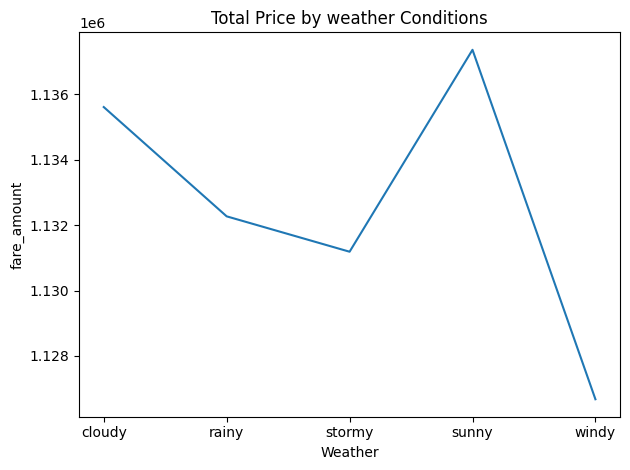

In [ ]:
#Group using "weather" and calculate the sum of "fare_amount" for each group
data_group = data.groupby("Weather")["fare_amount"].sum().reset_index()
#Create a line plot for the sum data
sns.lineplot(data=data_group, x="Weather", y="fare_amount")
plt.title('Total Price by weather Conditions')
plt.tight_layout()
plt.show()

Sunny weather leads to the highest fare amount

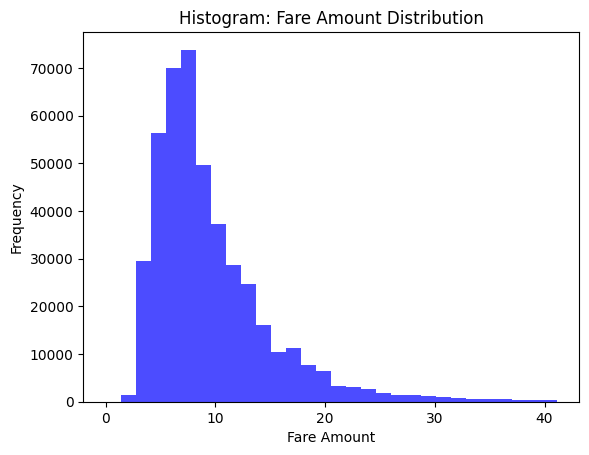

In [ ]:
# Histogram for fare_amount
plt.hist(data['fare_amount'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Histogram: Fare Amount Distribution')
plt.show()


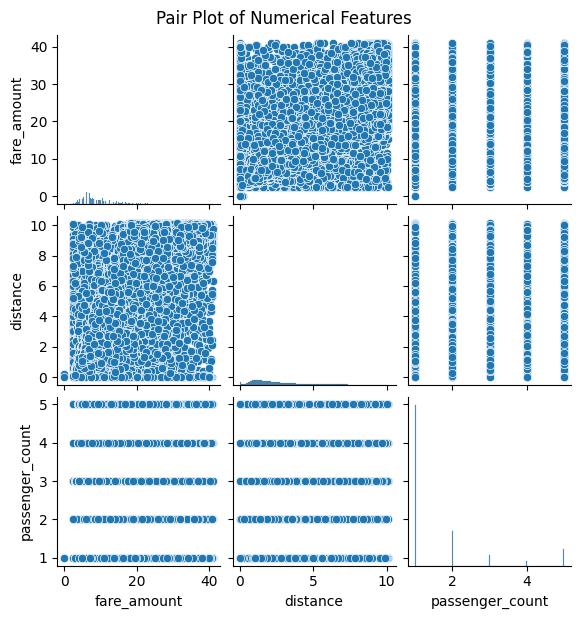

In [ ]:
import seaborn as sns

# pair plots to visualize scatter plots for multiple numerical features simultaneously
numerical_features = ['fare_amount', 'distance', 'passenger_count']
sns.pairplot(data[numerical_features], height=2)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


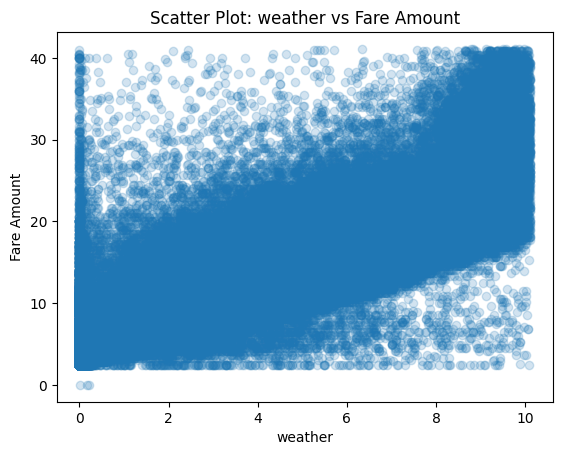

In [ ]:
# Scatter plot for distance vs fare_amount
plt.scatter(data['distance'], data['fare_amount'], alpha=0.2)
plt.xlabel('weather')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot: weather vs Fare Amount')
plt.show()


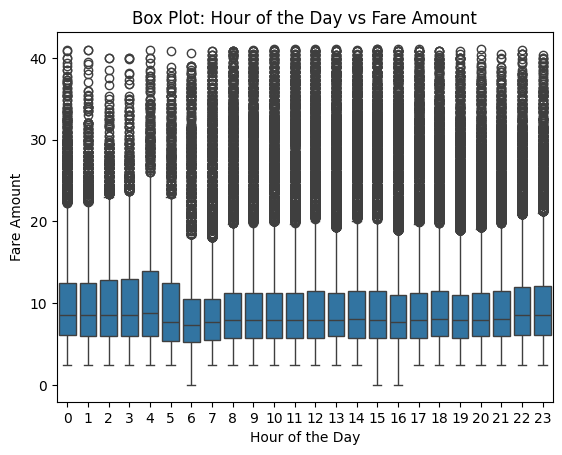

In [ ]:
# Box plot for hour vs fare_amount
sns.boxplot(x='hour', y='fare_amount', data=data)
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')
plt.title('Box Plot: Hour of the Day vs Fare Amount')
plt.show()

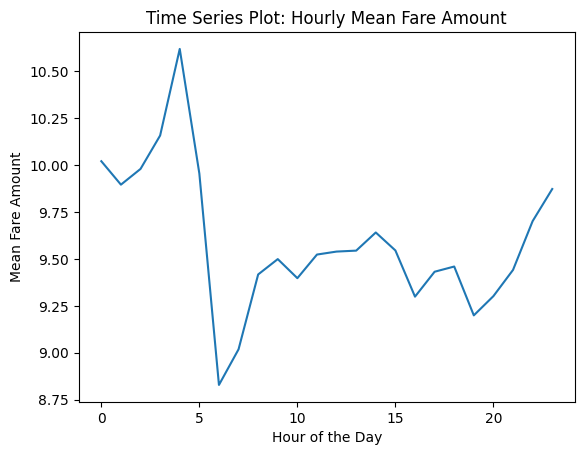

In [ ]:
# Time series plot for hour vs fare_amount
plt.plot(data.groupby('hour')['fare_amount'].mean())
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Fare Amount')
plt.title('Time Series Plot: Hourly Mean Fare Amount')
plt.show()

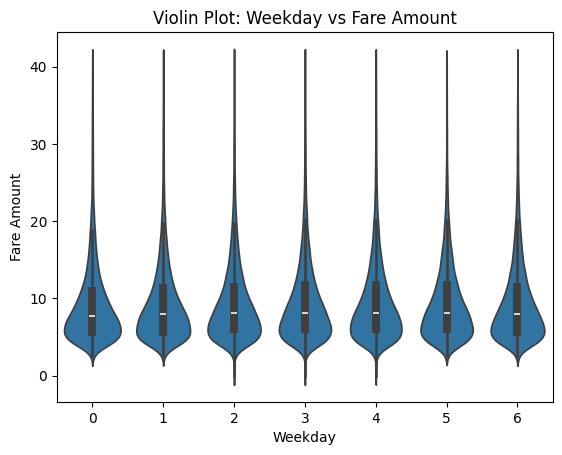

In [ ]:
# Visualize the distribution of fare amounts across different categories
# Violin plot for weekday vs fare_amount
sns.violinplot(x='weekday', y='fare_amount', data=data)
plt.xlabel('Weekday')
plt.ylabel('Fare Amount')
plt.title('Violin Plot: Weekday vs Fare Amount')
plt.show()

Sunny weather leads to the highest fare amount

<a name="Preprocessing"></a>
## 1.4 Preprocessing
Done by:
>- Maram
>- Nourhan


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [ ]:
print(data.columns)

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [ ]:
data['Car Condition'].value_counts()

Very Good    124865
Bad          124533
Good         124472
Excellent    124299
Name: Car Condition, dtype: int64

### <a name="encoding"></a>1.4.1 Encoding

In [ ]:
col={
    'Bad': 0,
    'Good': 1,
    'Very Good': 2,
    'Excellent': 3,
}
data.replace(col,inplace=True)

In [ ]:
data['Weather'].value_counts()

sunny     100033
cloudy     99707
stormy     99613
rainy      99610
windy      99206
Name: Weather, dtype: int64

In [ ]:
col={
    'sunny': 0,
    'cloudy': 1,
    'rainy': 2,
    'stormy': 3,
    'windy': 4
}
data.replace(col,inplace=True)

In [ ]:
data['Traffic Condition'].value_counts()

Congested Traffic    166224
Dense Traffic        165995
Flow Traffic         165950
Name: Traffic Condition, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['Traffic Condition'])

In [ ]:
data.head()

,Car Condition,Weather,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,...,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,2,4,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,...,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,1,0,0
1,3,1,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,...,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,0,0,1
2,0,3,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,...,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,1,0,0
3,2,3,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,...,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,0,0,1
4,0,3,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,...,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,1,0,0


In [ ]:
data['fare_amount'] = data['fare_amount'].round().astype(int)

### <a name="outliers"></a>1.4.2 Handling Outliers

In [ ]:
for column in data.columns:
  upp=data[column].mean()+3*data[column].std()
  low=data[column].mean()-3*data[column].std()
  data=data.loc[((data[column]<upp) &(data[column]>low))]

In [ ]:
# data.drop(data[(data['pickup_longitude'] > 10) | (data['pickup_longitude'] < -10)].index, inplace=True)
# data.drop(data[(data['pickup_latitude'] > 10) | (data['pickup_latitude'] < -10)].index, inplace=True)
# data.drop(data[(data['dropoff_latitude'] > 2) | (data['dropoff_latitude'] < -10)].index, inplace=True)
# data.drop(data[data['dropoff_longitude'] < -10].index, inplace=True)

# data.drop(data[data['distance'] >10000].index , inplace=True)

# data.drop(data[data['jfk_dist'] >15000].index , inplace=True)
# data.drop(data[data['ewr_dist'] >15000].index , inplace=True)
# data.drop(data[data['lga_dist'] >15000].index , inplace=True)
# data.drop(data[data['sol_dist'] >15000].index , inplace=True)
# data.drop(data[data['nyc_dist'] >15000].index , inplace=True)

# mean_fare = data[data['fare_amount'] <= 350]['fare_amount'].mean()
# data.loc[data['fare_amount'] > 350, 'fare_amount'] = mean_fare

# mean_distance=data[data['distance']].mean()
# data[data['distance']==0]=mean_distance

### <a name="selection"></a>1.4.3 Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
features = data.drop(["fare_amount"], axis=1)
target = data["fare_amount"]

k_best = SelectKBest(score_func=f_classif, k=10)

X = k_best.fit_transform(features, target)
y = target

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

distance: 2026.77
year: 832.95
pickup_longitude: 85.96
dropoff_longitude: 69.74
lga_dist: 62.67
jfk_dist: 59.96
ewr_dist: 57.96
nyc_dist: 34.30
sol_dist: 32.74
dropoff_latitude: 15.81


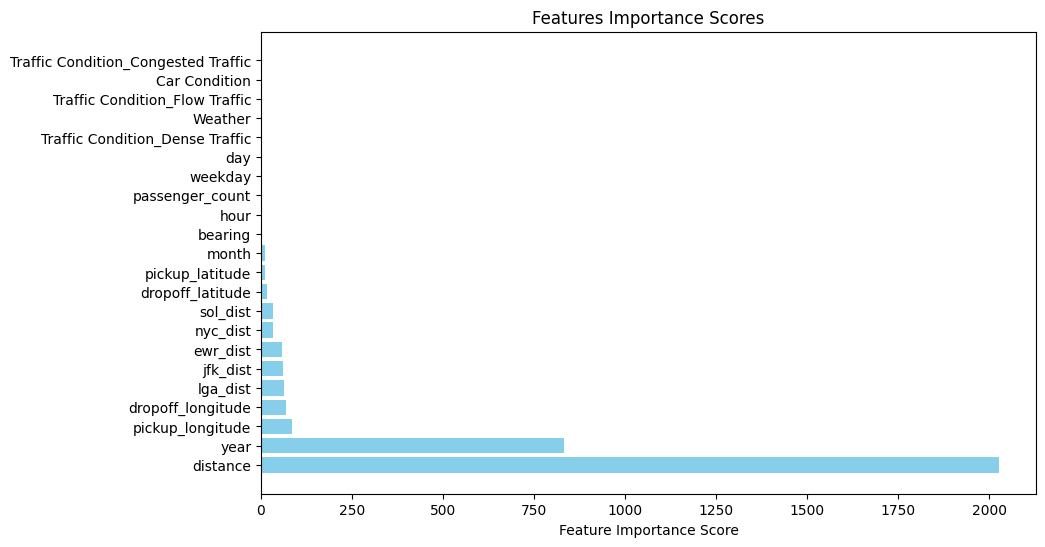

In [ ]:
feature_names, feature_scores = zip(*sorted_feature_info[:])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_scores, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Features Importance Scores")
plt.show()

In [ ]:
selected_features_df = features.iloc[:, selected_features_indices]
selected_features_df.head()

,dropoff_longitude,dropoff_latitude,month,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance
0,-1.288779,0.710563,6,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764
1,-1.291182,0.711780,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134
2,-1.291391,0.711231,8,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525
3,-1.291396,0.711363,4,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270
4,-1.290787,0.711811,3,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157


### <a name="normalization"></a>1.4.4 Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

print("Original data:")
print(data)

# Fit scaler to the data and transform the data
data = scaler.fit_transform(data)

print("\nNormalized data:")
print(data)

Original data:
        Car Condition  Weather  fare_amount  pickup_longitude  \
1                   3        1         16.9         -1.291824   
2                   0        3          5.7         -1.291242   
3                   2        3          7.7         -1.291319   
4                   0        3          5.3         -1.290987   
5                   3        0         12.1         -1.291560   
...               ...      ...          ...               ...   
498163              2        4         13.0         -1.291337   
498164              0        2          7.0         -1.291173   
498165              2        2         13.7         -1.291595   
498166              0        2         25.0         -1.291262   
498168              2        0          4.9         -1.291312   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
1              0.710546          -1.291182          0.711780                1   
2              0.711418          -1.291391

### <a name="splitting"></a>1.4.5 Splitting data into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
# Display shapes of train and test sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (354058, 10)
y_train shape: (354058,)
x_test shape: (88515, 10)
y_test shape: (88515,)


In [ ]:
data

,Car Condition,Weather,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,...,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,2,4,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,...,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,1,0,0
1,3,1,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,...,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,0,0,1
2,0,3,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,...,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,1,0,0
3,2,3,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,...,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,0,0,1
4,0,3,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,...,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488885,0,2,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,7,...,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706,0,1,0
488886,2,2,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,13,...,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931,0,0,1
488887,0,2,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,25,...,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251,0,0,1
488888,1,3,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,12,...,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817,1,0,0


In [ ]:
#To test instead of normalizing thwe whole data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_filtered_norm = scaler.fit_transform(x_train)
X_test_filtered_norm = scaler.fit_transform(x_test)

## <a name="models"></a>2.1 Applying Models

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
import math
from math import sqrt
from numpy import absolute
from numpy import mean
from numpy import std

### <a name="linear"></a>2.1.1 Linear Regression

In [ ]:
def Linear_reg(X_train, X_test, y_train, y_test):
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_train_predict = linear.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)
    RMSE_train = mean_squared_error(y_train, y_train_predict, squared=False)

    y_test_predict = linear.predict(X_test)
    r2_test = r2_score(y_test, y_test_predict)
    RMSE_test = mean_squared_error(y_test, y_test_predict, squared=False)
    plt.scatter(y_test, y_test_predict)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values for Linear Regression')
    plt.show()

    return r2_train, r2_test, linear,RMSE_train,RMSE_test


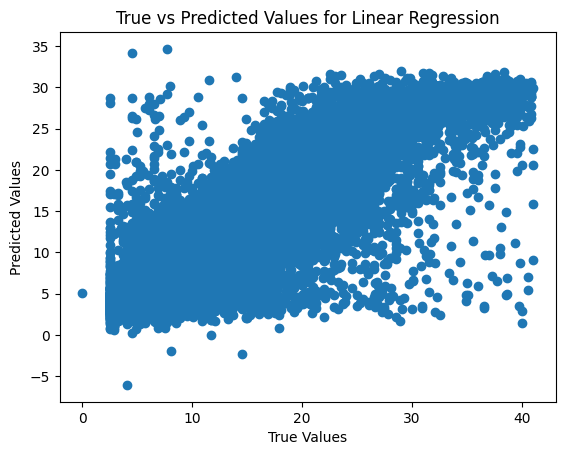

In [ ]:
r2_train, r2_test, linear,RMSE_train,RMSE_test = Linear_reg(x_train, x_test, y_train, y_test)

#### MSE and RMSE Values

In [ ]:
print("R^2 (train) : ", r2_train)
print("RMSE (train): ", RMSE_train)
print("MSE (train): ", RMSE_train**2)
print("R^2 (test) : ", r2_test)
print("RMSE (test): ", RMSE_test)
print("MSE (test): ", RMSE_test**2)

R^2 (train) :  0.7450819365329977
RMSE (train):  2.7203770058713044
MSE (train):  7.400451054073323
R^2 (test) :  0.7432093770807922
RMSE (test):  2.7228281525919447
MSE (test):  7.413793148547263


### <a name="polynomial"></a>2.1.2 Polynomial Regression

In [ ]:
import matplotlib.pyplot as plt
def Poly_reg(X_train, X_test, y_train, y_test, degree={'degree' : 3}):
    poly = PolynomialFeatures(degree=degree['degree'])
    X_train_ = poly.fit_transform(X_train)
    est_poly = LinearRegression()
    est_poly.fit(X_train_,y_train)

    y_train_predict = est_poly.predict(X_train_)
    r2_train = r2_score(y_train, y_train_predict)
    RMSE_train = mean_squared_error(y_train, y_train_predict, squared=False)


    X_test_ = poly.fit_transform(X_test)

    y_test_predict = est_poly.predict(X_test_)
    r2_test = r2_score(y_test, y_test_predict)
    RMSE_test = mean_squared_error(y_test, y_test_predict, squared=False)


    plt.scatter(y_test, y_test_predict)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values for Polynomial Regression')
    plt.show()

    return r2_train, r2_test, RMSE_train, RMSE_test

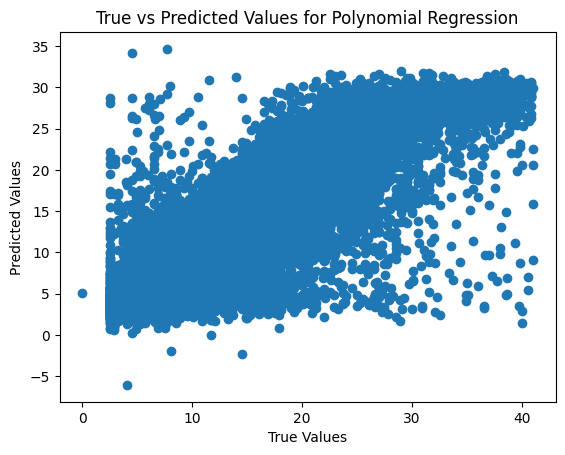

Polynomial degree 1
R^2 (train) :  0.7450819365330001
RMSE (train):  2.7203770058712915
MSE (train):  7.400451054073253
R^2 (test) :  0.7432093770808175
RMSE (test):  2.722828152591811
MSE (test):  7.413793148546534




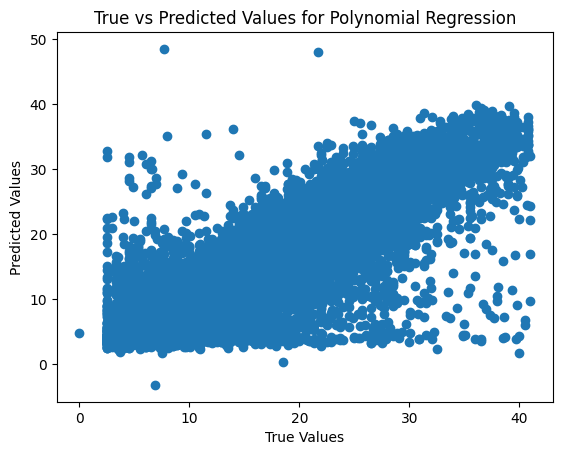

Polynomial degree 2
R^2 (train) :  0.7781662234418201
RMSE (train):  2.537713712499342
MSE (train):  6.439990886607192
R^2 (test) :  0.7754690360133534
RMSE (test):  2.5460608116882724
MSE (test):  6.482425656814744




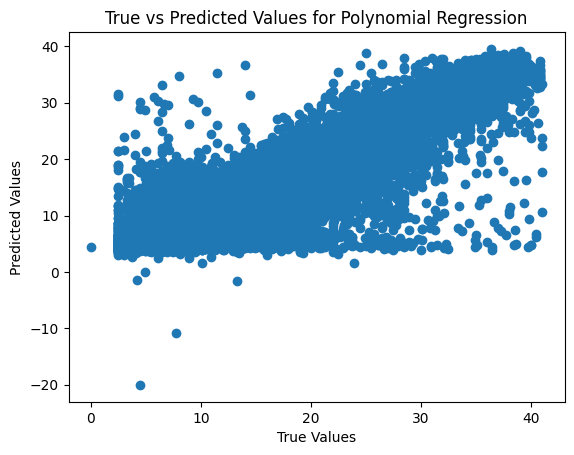

Polynomial degree 3
R^2 (train) :  0.7932919852085842
RMSE (train):  2.4496692351340412
MSE (train):  6.000879361562198
R^2 (test) :  0.790256848839144
RMSE (test):  2.460789959896838
MSE (test):  6.055487226729082




In [ ]:
for deg in range(1,4):
    degree={'degree' : deg}
    r2_train, r2_test,RMSE_train, RMSE_test = Poly_reg(x_train, x_test, y_train, y_test, degree)
    print("Polynomial degree", deg)
    print("R^2 (train) : ", r2_train)
    print("RMSE (train): ", RMSE_train)
    print("MSE (train): ", RMSE_train**2)
    print("R^2 (test) : ", r2_test)
    print("RMSE (test): ", RMSE_test)
    print("MSE (test): ", RMSE_test**2)
    print("\n")

### <a name="ridge"></a>2.1.3 Ridge Regression


In [ ]:
# another method
# model = Ridge(alpha=1.0)
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# model.fit(x_train,y_train)
# pred = model.predict(x_test)
# scores = cross_val_score(model, x_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# scores = absolute(scores)
# print('rmse: %.3f (%.3f)' % (mean(scores), std(scores)))


rmse: 2.762 (0.026)


In [ ]:
from sklearn.model_selection import cross_val_score
def Ridge_reg(X_train, X_test, y_train, y_test):
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)

    y_train_predict = ridge.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)
    RMSE_train = mean_squared_error(y_train, y_train_predict, squared=False)

    y_test_predict = ridge.predict(X_test)
    r2_test = r2_score(y_test, y_test_predict)
    RMSE_test = mean_squared_error(y_test, y_test_predict, squared=False)
    plt.scatter(y_test, y_test_predict)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values for ridge Regression')
    plt.show()

    return r2_train, r2_test, linear,RMSE_train,RMSE_test

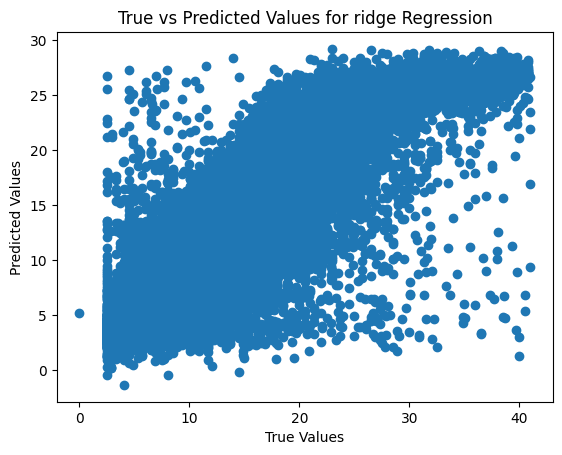

In [ ]:
r2_train, r2_test, linear,RMSE_train,RMSE_test = Ridge_reg(x_train, x_test, y_train, y_test)

#### MSE & RMSE values

In [ ]:
print("Ridge Regression")
print("R^2 (train) : ", r2_train)
print("MSE (train): ", RMSE_train**2)
print("RMSE (train): ", RMSE_train)
print("R^2 (test) : ", r2_test)
print("RMSE (test): ", RMSE_test)
print("MSE (test): ", RMSE_test**2)

Ridge Regression
R^2 (train) :  0.7372442562905512
MSE (train):  7.62798443567384
RMSE (train):  2.7618805976496956
R^2 (test) :  0.7359957789753004
RMSE (test):  2.760807253090002
MSE (test):  7.622056688714363


## <a name="compare"></a>2.2 Compare with last week's results


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

n=1

# create a PolynomialFeatures object with degree = n
poly_features = PolynomialFeatures(degree=n)

# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(x_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
X_test_poly = poly_features.fit_transform(x_test)
y_test_predict = poly_model.predict(X_test_poly)

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))


The model performance for the training set
-------------------------------------------
RMSE of training set is 2.7203770058712915
R2 score of training set is 0.7450819365330001


The model performance for the test set
-------------------------------------------
RMSE of test set is 2.722828152591811
R2 score of test set is 0.7432093770808175


## <a name="conclusion"></a>2.3 Conclusion


**As we see:**
>- Polynomial regression of the third degree is the best algorithm <font color='yellow'> (RMSE=2.460) </font>
>- Polynomial regression of the second degree is the second best algorithm
<font color='yellow'> (RMSE=2.546) </font>
>- Linear regression is the third best algorithm
<font color='yellow'> (RMSE=2.7228) </font>
>- Polynomial regression of the first degree is the third best algorithm
<font color='yellow'> (RMSE=2.7228) </font>
>- Ridge regression is the fifth best algorithm
<font color='yellow'> (RMSE=2.760) </font>